## Using Cluster Analysis for Customer Segmentation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mall_data = pd.read_csv('Mall_Customers.csv')

In [3]:
# Top 5 Records
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Dimensions of the data
mall_data.shape

(200, 5)

In [5]:
# Summary Statistics
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Check For Null Values
mall_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
mall_data['CustomerID'].nunique()

200

In [8]:
mall_data['Gender'].nunique()

2

# Visualizations

<AxesSubplot:xlabel='Gender', ylabel='count'>

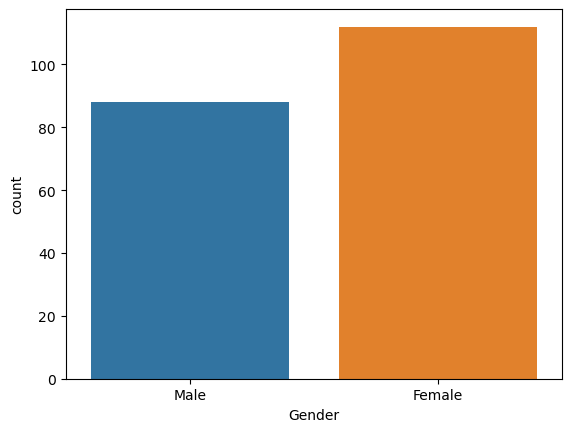

In [9]:
#gender
sns.countplot(x='Gender', data=mall_data)

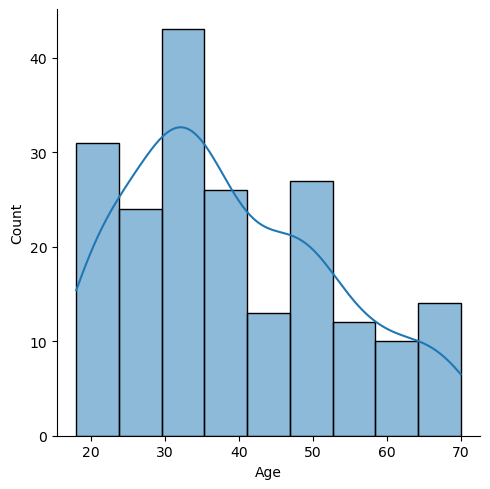

In [10]:
sns.displot(mall_data['Age'],kde=True)

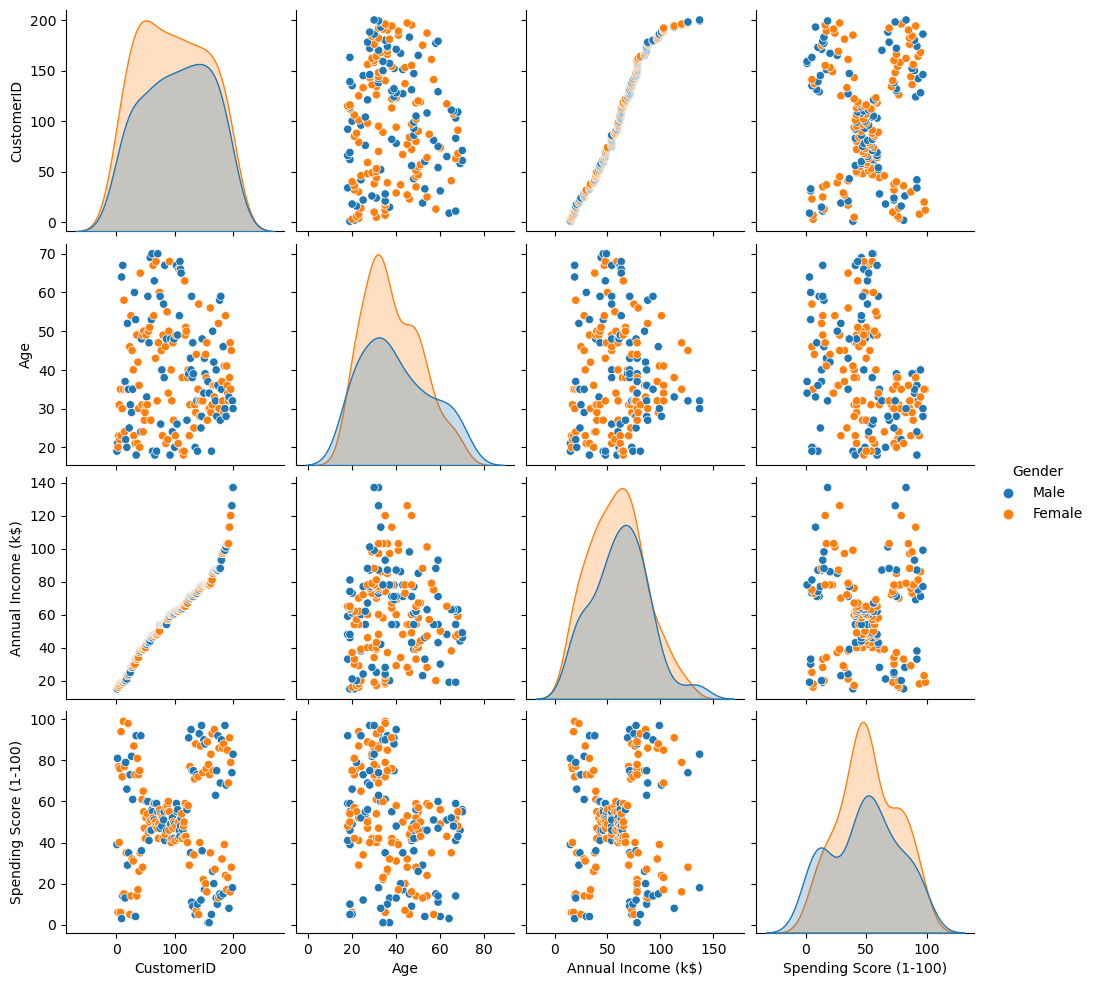

In [11]:
sns.pairplot(mall_data,hue='Gender')

In [12]:
#dropping gender and customer id
#gender does not have any impact
df=mall_data.drop(columns=['Gender','CustomerID'], axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [13]:
# Scale the data
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [15]:
cols=df.columns
cols

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [16]:
X = pd.DataFrame(scaler.transform(df),columns=cols)
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [17]:
X.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


# K-Means Clustering

In [18]:
from sklearn.cluster import KMeans

In [19]:
sse= {}
for k in range(2, 20):
    kmeans_loop = KMeans(n_clusters=k,n_init=30,max_iter=300,random_state=1000).fit(X)
    clusters = kmeans_loop.labels_
    sse[k] = kmeans_loop.inertia_

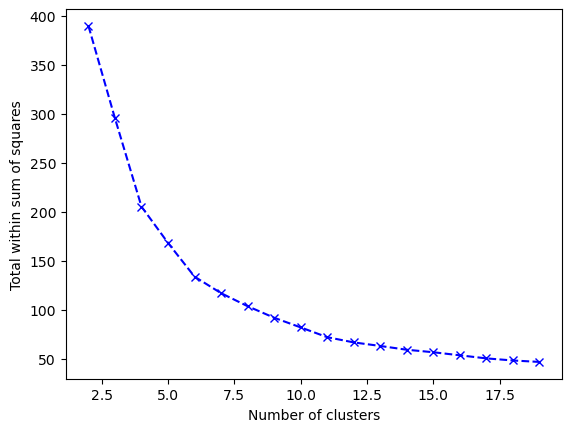

In [20]:
%matplotlib inline
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()), 'bx--')
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
plt.show()

Silhouette Scores

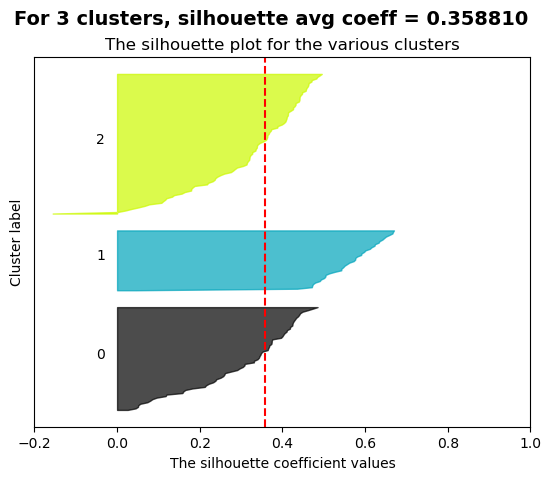

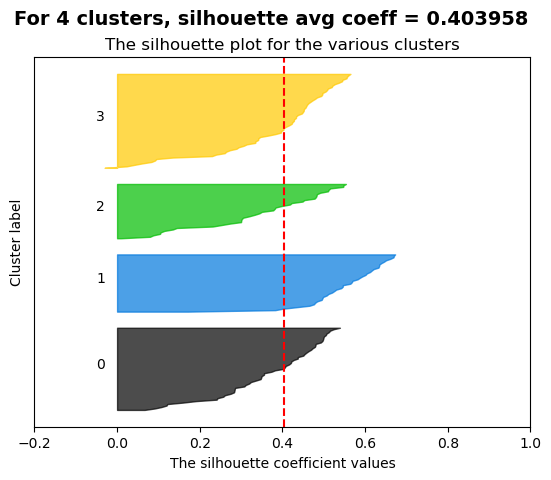

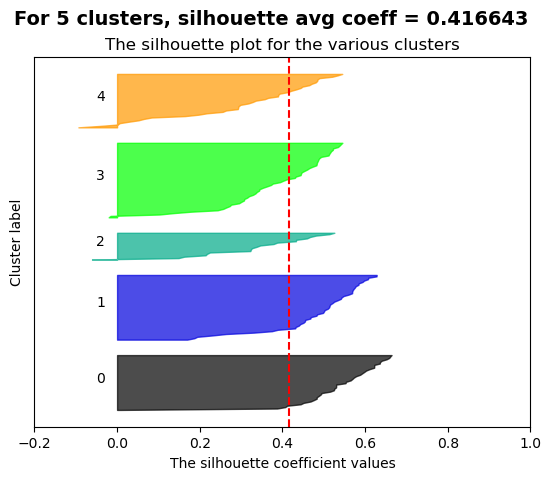

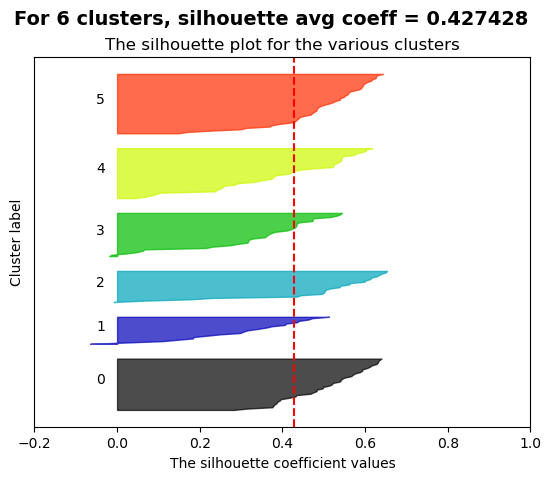

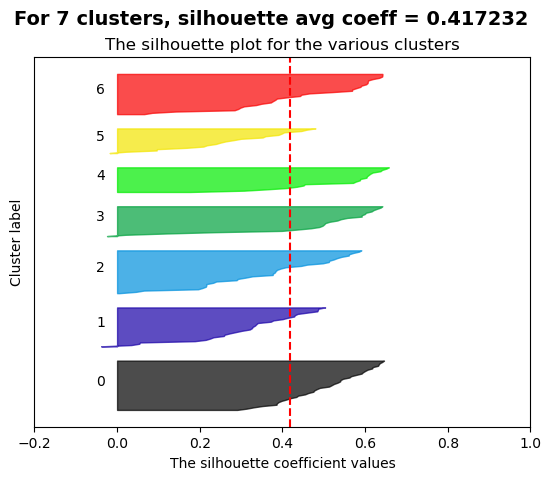

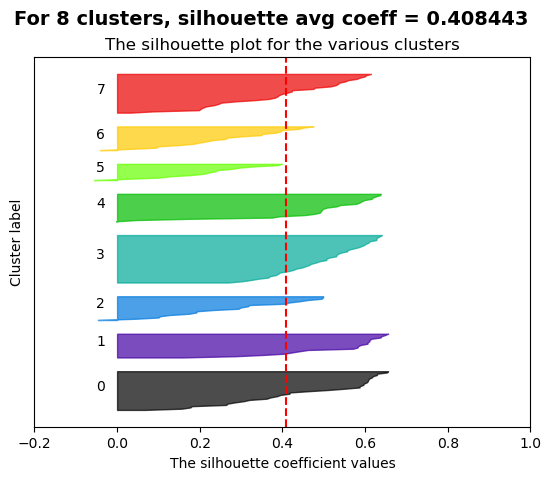

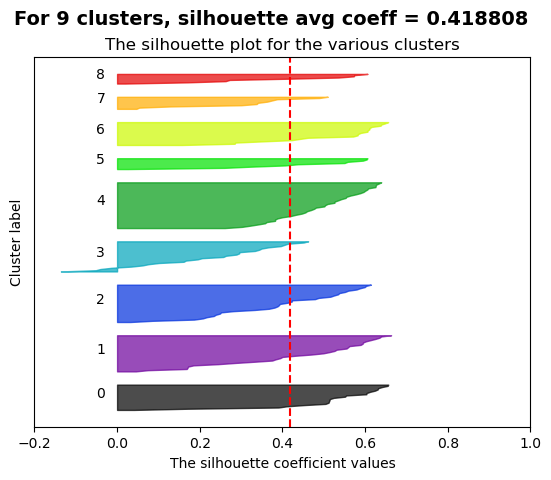

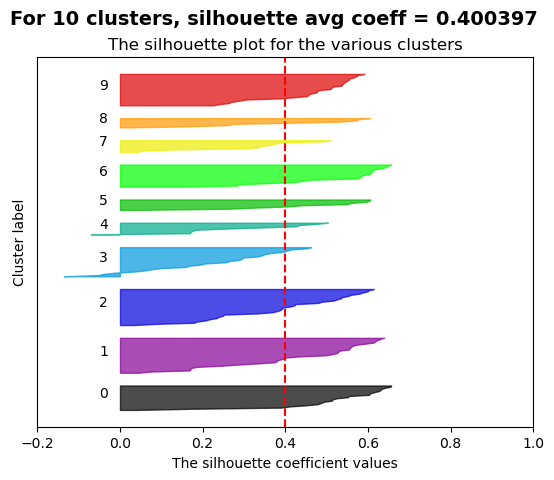

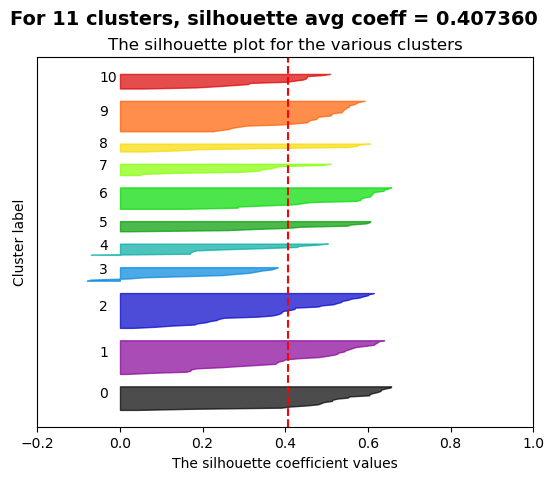

In [26]:
## Standard plotting code copied from sklearn documentation.
## Just change "X_matrix" to the data of your choice

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X_matrix = X.values

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots()


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

4 clusters seem to have optimum silhouette scores

In [27]:
best_kmeans = KMeans(n_clusters=4, init='random',n_init=20,random_state=1240)
best_kmeans.fit(X)
best_kmeans_labels = best_kmeans.labels_

In [28]:
best_kmeans_labels

array([3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

# Plotting the clusters in a 3 dimensinal space

In [29]:
import plotly.express as px

In [30]:
clusters = best_kmeans_labels
A = df.assign(cluster = clusters)
fig = px.scatter_3d(A, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='cluster')

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

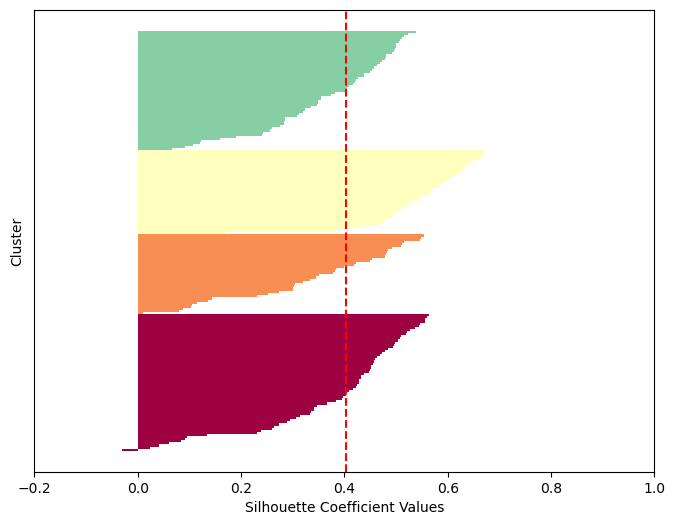

In [31]:
silhouette_vals = silhouette_samples(X, best_kmeans_labels)

# Compute the mean silhouette score for the entire dataset
silhouette_avg = silhouette_score(X, best_kmeans_labels)

# Compute the silhouette scores for each cluster
cluster_silhouette_vals = []
for i in range(4):
    cluster_silhouette_vals.append(
        silhouette_vals[best_kmeans_labels == i])

# Plot the silhouette scores for each cluster
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

y_lower, y_upper = 0, 0
for i in range(4):
    ith_cluster_silhouette_vals = cluster_silhouette_vals[i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper += size_cluster_i
    color = plt.cm.get_cmap('Spectral')(float(i) / 4)
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, height=1.0,
            edgecolor='none', color=color)

    y_lower += size_cluster_i

# Add the silhouette score for the entire dataset
ax.axvline(x=silhouette_avg, color='red', linestyle='--')
ax.set_xlabel('Silhouette Coefficient Values')
ax.set_ylabel('Cluster')
ax.set_yticks([])
ax.set_xlim([-0.2, 1])
plt.show()

In [32]:
df['clusters1']=best_kmeans_labels
df.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters1
0,19,15,39,3
1,21,15,81,3
2,20,16,6,3
3,23,16,77,3
4,31,17,40,3


In [34]:
#analysing the clusters
for i in range(0,4):
    print(df[df['clusters1']==i].describe())

             Age  Annual Income (k$)  Spending Score (1-100)  clusters1
count  65.000000           65.000000               65.000000       65.0
mean   53.984615           47.707692               39.969231        0.0
std     9.418221           14.648723               16.405953        0.0
min    35.000000           18.000000                3.000000        0.0
25%    48.000000           39.000000               32.000000        0.0
50%    52.000000           49.000000               46.000000        0.0
75%    63.000000           60.000000               51.000000        0.0
max    70.000000           79.000000               60.000000        0.0
             Age  Annual Income (k$)  Spending Score (1-100)  clusters1
count  38.000000           38.000000               38.000000       38.0
mean   39.368421           86.500000               19.578947        1.0
std    10.617225           16.761845               11.684204        0.0
min    19.000000           64.000000                1.000000    

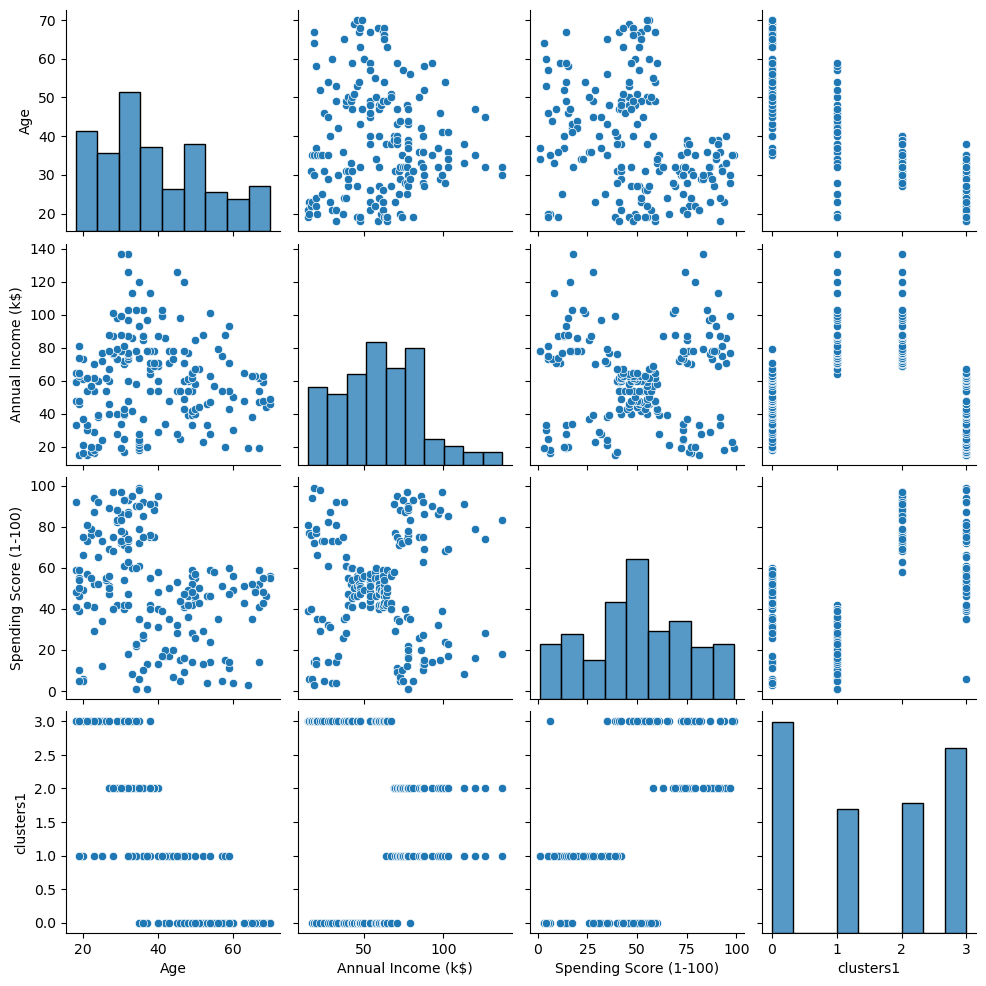

In [35]:
sns.pairplot(df)

In [ ]:
#cluster 0- Spending score:range(3-60), annual income:range(18-79); age:range(35-70)
#cluster 1- Spending score:range(1-42); annual income:range(64-137); age:range(19-59)
#cluster 2- Spending score:range(58-97); annual income:range(69-137); age:range(27-40)
#cluster 3- Spending score:range(6-99); annual income:range(15-67); age:range(18-38)

# using kmean ++ for better initialisation

In [36]:

kmeans_plus = KMeans(n_clusters=4, init='k-means++',n_init=20,random_state=1000)

# Fit the KMeans model to the data
kmeans_plus.fit(X)

# Get the cluster assignments
kmeans_plus_labels = kmeans_plus.labels_

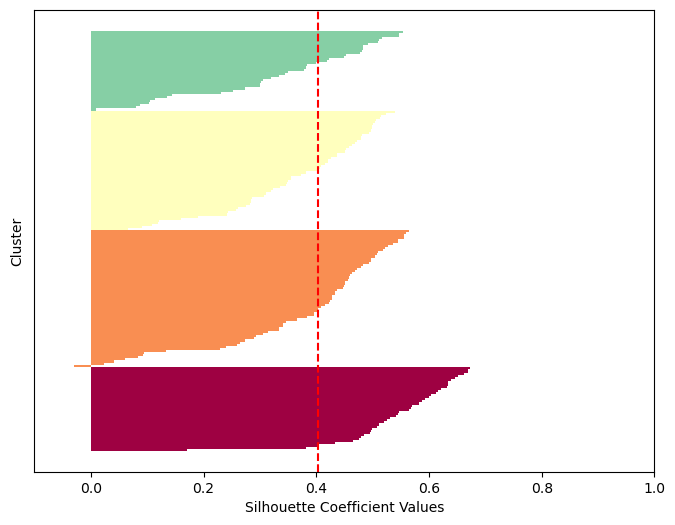

In [37]:
silhouette_vals = silhouette_samples(X, kmeans_plus_labels)

# Compute the mean silhouette score for the entire dataset
silhouette_avg = silhouette_score(X, kmeans_plus_labels)

# Compute the silhouette scores for each cluster
cluster_silhouette_vals = []
for i in range(4):
    cluster_silhouette_vals.append(
        silhouette_vals[kmeans_plus_labels == i])

# Plot the silhouette scores for each cluster
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

y_lower, y_upper = 0, 0
for i in range(4):
    ith_cluster_silhouette_vals = cluster_silhouette_vals[i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper += size_cluster_i
    color = plt.cm.get_cmap('Spectral')(float(i) / 4)
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, height=1.0,
            edgecolor='none', color=color)

    y_lower += size_cluster_i

# Add the silhouette score for the entire dataset
ax.axvline(x=silhouette_avg, color='red', linestyle='--')
ax.set_xlabel('Silhouette Coefficient Values')
ax.set_ylabel('Cluster')
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
plt.show()

In [38]:
df['clusters2']=kmeans_plus_labels
df.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters1,clusters2
0,19,15,39,3,2
1,21,15,81,3,2
2,20,16,6,3,2
3,23,16,77,3,2
4,31,17,40,3,2


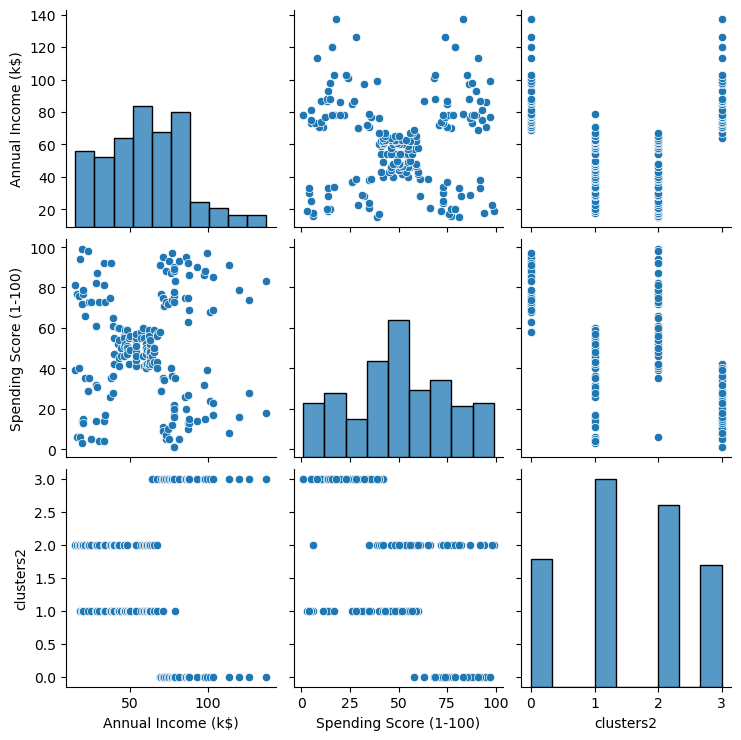

In [39]:
sns.pairplot(x_vars=['Annual Income (k$)','Spending Score (1-100)','clusters2'],
             y_vars=['Annual Income (k$)','Spending Score (1-100)','clusters2'],data=df)

In [40]:
#analysing the clusters
df1=df.drop('clusters1',axis=1)
for i in range(0,4):
    print(df1[df1['clusters2']==i].describe())

             Age  Annual Income (k$)  Spending Score (1-100)  clusters2
count  40.000000           40.000000               40.000000       40.0
mean   32.875000           86.100000               81.525000        0.0
std     3.857643           16.339036                9.999968        0.0
min    27.000000           69.000000               58.000000        0.0
25%    30.000000           74.750000               74.000000        0.0
50%    32.000000           78.500000               83.000000        0.0
75%    36.000000           94.000000               90.000000        0.0
max    40.000000          137.000000               97.000000        0.0
             Age  Annual Income (k$)  Spending Score (1-100)  clusters2
count  65.000000           65.000000               65.000000       65.0
mean   53.984615           47.707692               39.969231        1.0
std     9.418221           14.648723               16.405953        0.0
min    35.000000           18.000000                3.000000    

# Further analysing the clusters that have been formed

In [59]:
#creating age bins to make the analysis simple
bin_edges = [18, 20, 30, 40, 50, 60,70]
bin_labels = ['<20', '20-30', '30-40', '40-50', '50-60','60-70']


df['age_bin'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels)

# Print the resulting DataFrame
print(df)

     Age  Annual Income (k$)  Spending Score (1-100)  clusters1  clusters2  \
0     19                  15                      39          3          2   
1     21                  15                      81          3          2   
2     20                  16                       6          3          2   
3     23                  16                      77          3          2   
4     31                  17                      40          3          2   
..   ...                 ...                     ...        ...        ...   
195   35                 120                      79          2          0   
196   45                 126                      28          1          3   
197   32                 126                      74          2          0   
198   32                 137                      18          1          3   
199   30                 137                      83          2          0   

    age_bin  
0       <20  
1     20-30  
2       <20  
3     2

In [60]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters1,clusters2,age_bin
0,19,15,39,3,2,<20
1,21,15,81,3,2,20-30
2,20,16,6,3,2,<20
3,23,16,77,3,2,20-30
4,31,17,40,3,2,30-40


the clusters formed are similar to the previous clusters formed

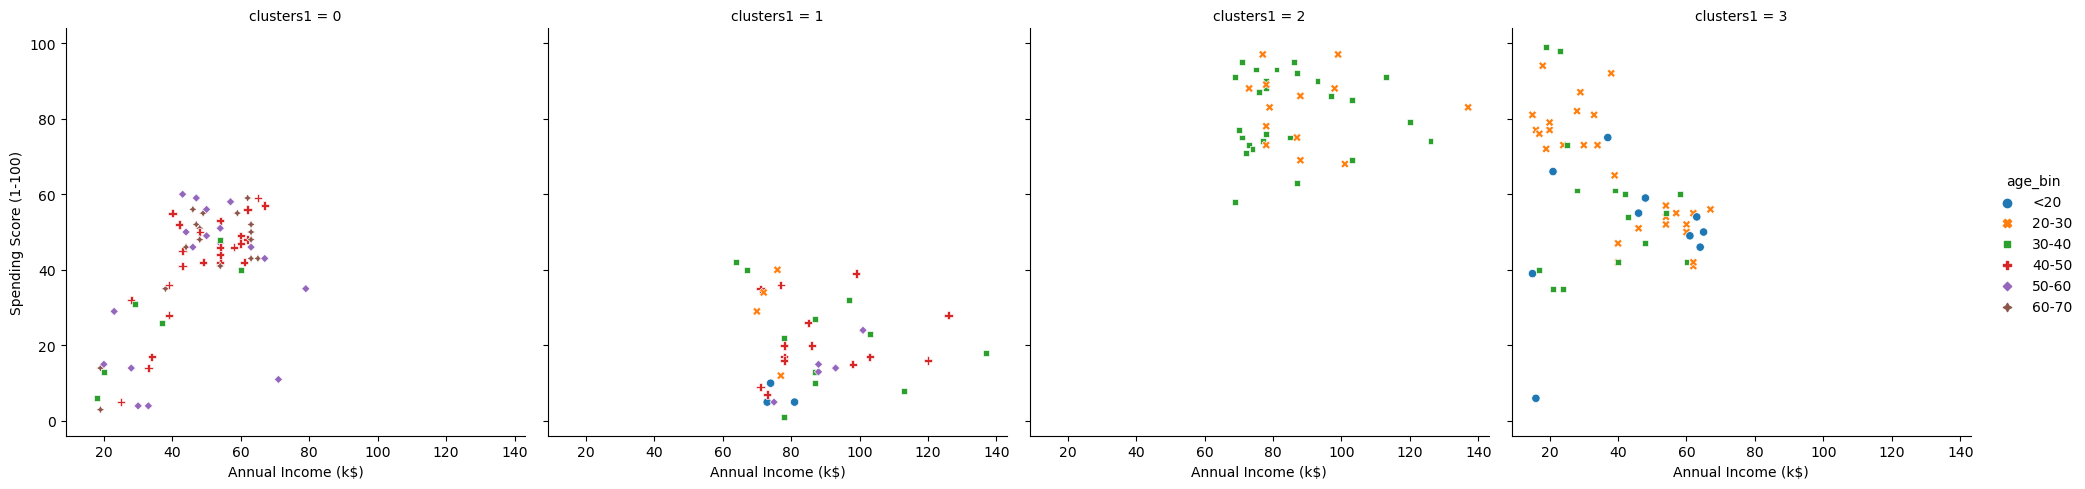

In [62]:
sns.relplot(
    data=df,
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue='age_bin', style="age_bin", col="clusters1",kind="scatter")

Age does not seem to have specific patterns in the clusters. It might be causing the clusters to not be created properly.

# Creating Clusters with only spending score and annual income

In [63]:
X1=X.drop('Age',axis=1)
X1.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [64]:
kmeans_wa = KMeans(n_clusters=4, init='k-means++',n_init=20,random_state=100)

# Fit the KMeans model to the data
kmeans_wa.fit(X1)

# Get the cluster assignments
kmeans_wa_labels = kmeans_wa.labels_

In [65]:
kmeans_wa_labels

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

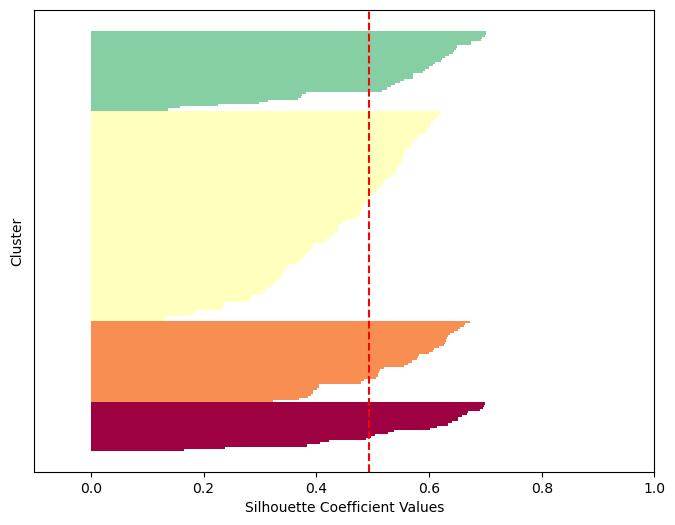

In [66]:
silhouette_vals = silhouette_samples(X1, kmeans_wa_labels)

# Compute the mean silhouette score for the entire dataset
silhouette_avg = silhouette_score(X1, kmeans_wa_labels)

# Compute the silhouette scores for each cluster
cluster_silhouette_vals = []
for i in range(4):
    cluster_silhouette_vals.append(
        silhouette_vals[kmeans_wa_labels == i])

# Plot the silhouette scores for each cluster
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

y_lower, y_upper = 0, 0
for i in range(4):
    ith_cluster_silhouette_vals = cluster_silhouette_vals[i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper += size_cluster_i
    color = plt.cm.get_cmap('Spectral')(float(i) / 4)
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, height=1.0,
            edgecolor='none', color=color)

    y_lower += size_cluster_i

# Add the silhouette score for the entire dataset
ax.axvline(x=silhouette_avg, color='red', linestyle='--')
ax.set_xlabel('Silhouette Coefficient Values')
ax.set_ylabel('Cluster')
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
plt.show()

In [67]:
df['clusters3']=kmeans_wa_labels
df.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters1,clusters2,age_bin,clusters3
0,19,15,39,3,2,<20,0
1,21,15,81,3,2,20-30,2
2,20,16,6,3,2,<20,0
3,23,16,77,3,2,20-30,2
4,31,17,40,3,2,30-40,0


In [68]:
#analysing the clusters
df1=df.drop(['clusters1','clusters2'],axis=1)
for i in range(0,4):
    print(df1[df1['clusters3']==i].describe())

             Age  Annual Income (k$)  Spending Score (1-100)  clusters3
count  23.000000           23.000000               23.000000       23.0
mean   45.217391           26.304348               20.913043        0.0
std    13.228607            7.893811               13.017167        0.0
min    19.000000           15.000000                3.000000        0.0
25%    35.500000           19.500000                9.500000        0.0
50%    46.000000           25.000000               17.000000        0.0
75%    53.500000           33.000000               33.500000        0.0
max    67.000000           39.000000               40.000000        0.0
             Age  Annual Income (k$)  Spending Score (1-100)  clusters3
count  39.000000           39.000000               39.000000       39.0
mean   32.692308           86.538462               82.128205        1.0
std     3.728650           16.312485                9.364489        0.0
min    27.000000           69.000000               63.000000    

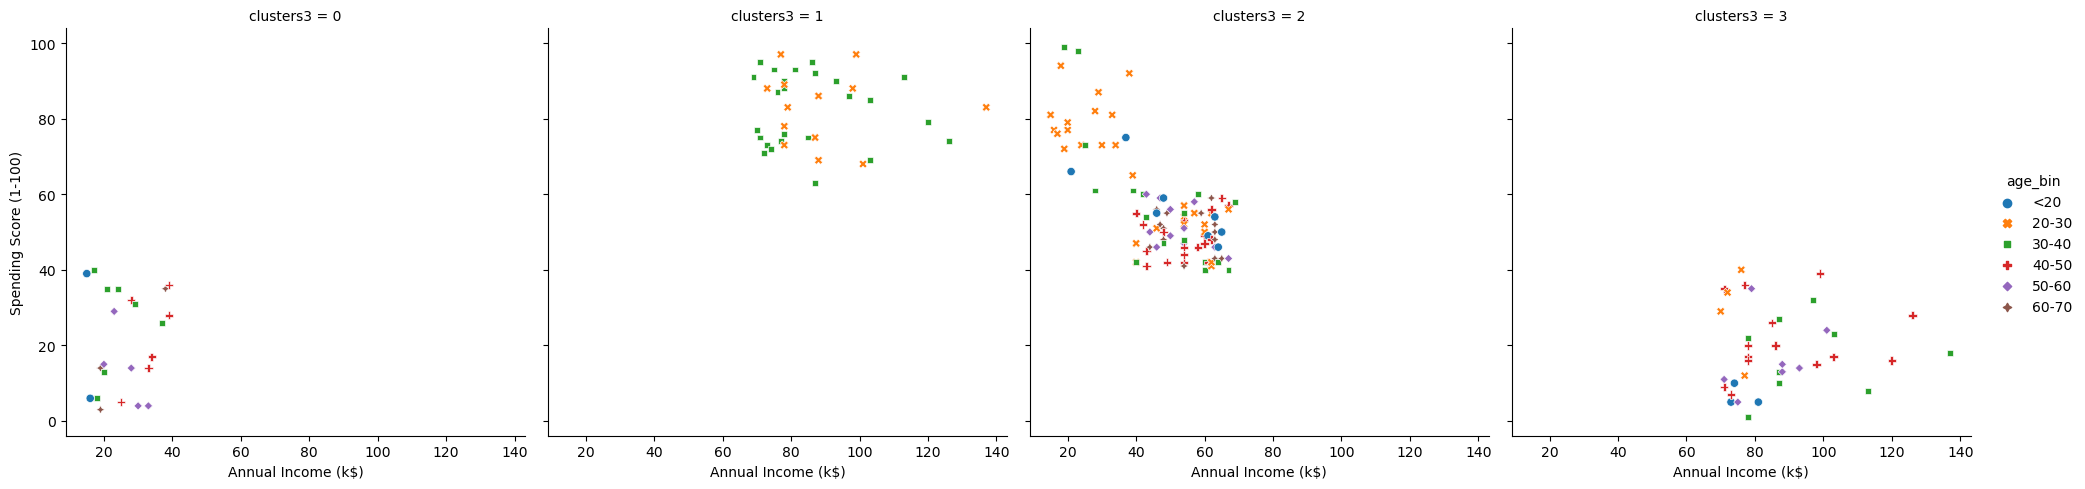

In [70]:
sns.relplot(
    data=df,
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue='age_bin', style="age_bin", col="clusters3",kind="scatter")

In [71]:
#creating 5 clusters
kmeans_wa2 = KMeans(n_clusters=5, init='k-means++',n_init=20,random_state=100)

# Fit the KMeans model to the data
kmeans_wa2.fit(X1)

# Get the cluster assignments
kmeans_wa_labels2 = kmeans_wa2.labels_

In [72]:
kmeans_wa_labels2

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

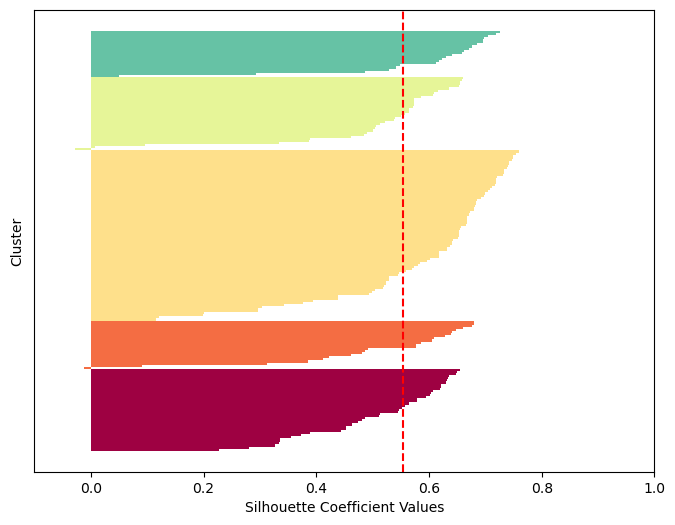

In [74]:
silhouette_vals = silhouette_samples(X1, kmeans_wa_labels2)

# Compute the mean silhouette score for the entire dataset
silhouette_avg = silhouette_score(X1, kmeans_wa_labels2)

# Compute the silhouette scores for each cluster
cluster_silhouette_vals = []
for i in range(5):
    cluster_silhouette_vals.append(
        silhouette_vals[kmeans_wa_labels2 == i])

# Plot the silhouette scores for each cluster
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

y_lower, y_upper = 0, 0
for i in range(5):
    ith_cluster_silhouette_vals = cluster_silhouette_vals[i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper += size_cluster_i
    color = plt.cm.get_cmap('Spectral')(float(i) / 5)
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, height=1.0,
            edgecolor='none', color=color)

    y_lower += size_cluster_i

# Add the silhouette score for the entire dataset
ax.axvline(x=silhouette_avg, color='red', linestyle='--')
ax.set_xlabel('Silhouette Coefficient Values')
ax.set_ylabel('Cluster')
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
plt.show()

In [76]:
df['clusters4']=kmeans_wa_labels2
df.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters1,clusters2,age_bin,clusters3,clusters4
0,19,15,39,3,2,<20,0,1
1,21,15,81,3,2,20-30,2,4
2,20,16,6,3,2,<20,0,1
3,23,16,77,3,2,20-30,2,4
4,31,17,40,3,2,30-40,0,1


In [77]:
#analysing the clusters
df1=df.drop(['clusters1','clusters2','clusters3'],axis=1)
for i in range(0,5):
    print(df1[df1['clusters4']==i].describe())

             Age  Annual Income (k$)  Spending Score (1-100)  clusters4
count  39.000000           39.000000               39.000000       39.0
mean   32.692308           86.538462               82.128205        0.0
std     3.728650           16.312485                9.364489        0.0
min    27.000000           69.000000               63.000000        0.0
25%    30.000000           75.500000               74.500000        0.0
50%    32.000000           79.000000               83.000000        0.0
75%    35.500000           95.000000               90.000000        0.0
max    40.000000          137.000000               97.000000        0.0
             Age  Annual Income (k$)  Spending Score (1-100)  clusters4
count  23.000000           23.000000               23.000000       23.0
mean   45.217391           26.304348               20.913043        1.0
std    13.228607            7.893811               13.017167        0.0
min    19.000000           15.000000                3.000000    

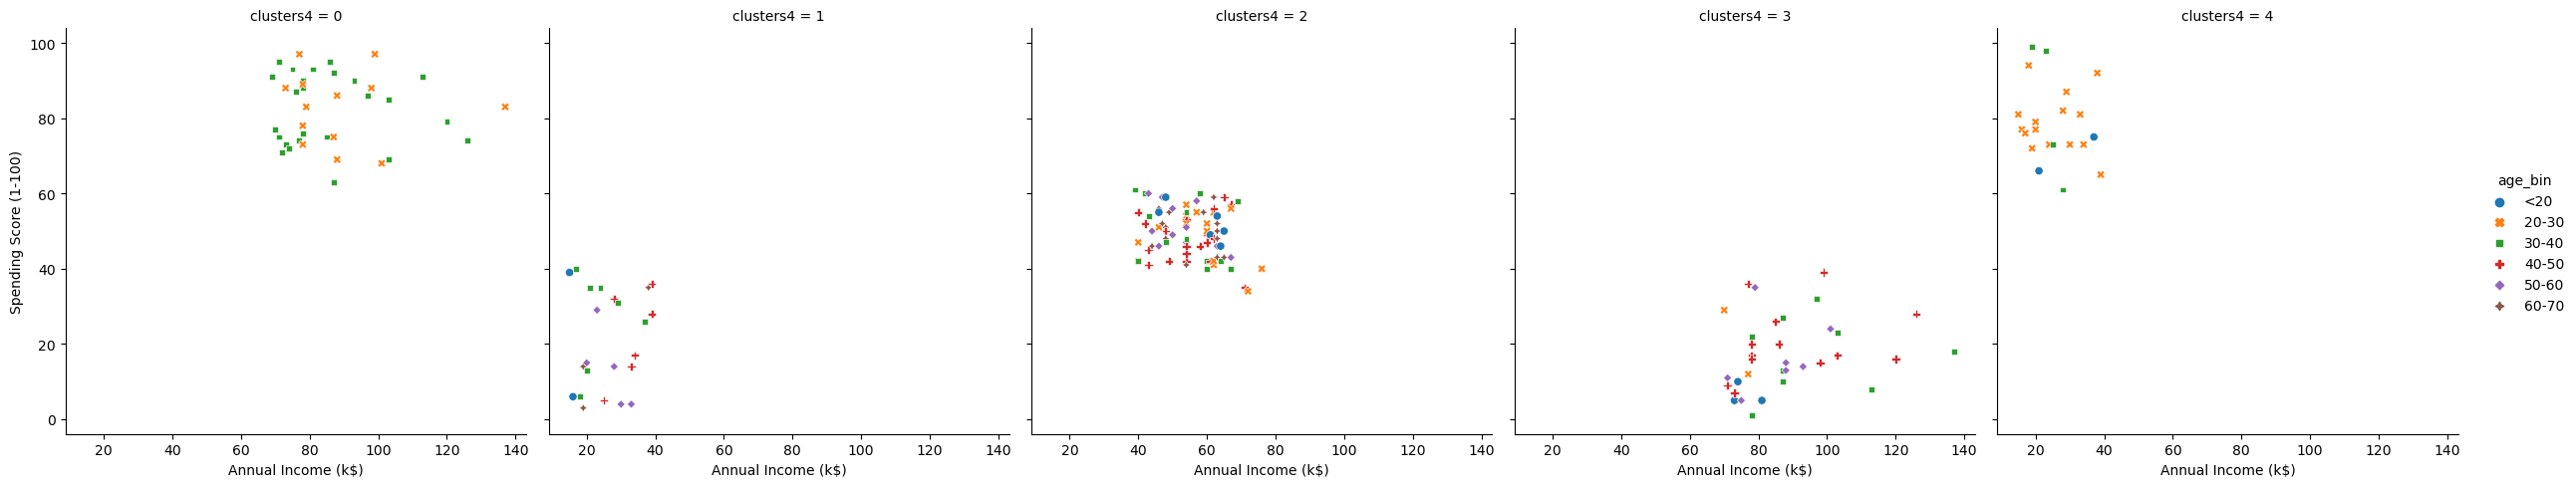

In [78]:
sns.relplot(
    data=df,
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue='age_bin', style="age_bin", col="clusters4",kind="scatter")

Therefore the clusters can be characterized as below:

Cluster0: High income(69-137),high spending score(63-97) and the age ranges from 27 to 40

Cluster1: Low income(15-39),low spending score(3-40) and the age ranges from 19 to 67

Cluster2: Intermediate income (39-76), intermediate spending score(34-61) and the age ranges from 18 to 70

Cluster3: High income(70-137),low spending score(1-39) and the age ranges from 19 to 59

Cluster4: Low income(15-39),high spending score(61-99) and the age ranges from 18 to 35